# ***Problem statement:***

Due to increasing churn rate of customers from last several quarters, the company has decided to dive deep into factors driving it. Past efforts in retaining customers have been reactive where the suggested steps were applied at the point of no return. The idea is to use machine learning to predict the likelihood of churn for each customer and reasons behind it. These reasons could be different for each customer. This will help with targeted response tailored to customer’s preferences thereby helping them stay and improving customer loyalty.

You are a data scientist in the team tasked to drive its implementation. You will be responsible for conceptualizing end to end pipeline for training a supervised model for churn prediction i.e., data preparation, understanding factors and their trends, model training and validation of results.

Dataset : Telco_Customer_Churn.csv

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ***Read Data and Basic Data Checks***

In [180]:
telcoDF = pd.read_csv('/content/drive/MyDrive/TSW_IIT_CapstoneProject/5 Telecom Customer Churn/Telco-Customer-Churn.csv')
telcoDF.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
telcoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [182]:
telcoDF.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,5271-DBYSJ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [183]:
telcoDF.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [184]:
from enum import unique
for clmn in telcoDF.columns:
  print("Unique values in column {0} are {1} ".format(clmn, str(telcoDF[clmn].unique())))

Unique values in column customerID are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
Unique values in column gender are ['Female' 'Male'] 
Unique values in column SeniorCitizen are [0 1] 
Unique values in column Partner are ['Yes' 'No'] 
Unique values in column Dependents are ['No' 'Yes'] 
Unique values in column tenure are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
Unique values in column PhoneService are ['No' 'Yes'] 
Unique values in column MultipleLines are ['No phone service' 'No' 'Yes'] 
Unique values in column InternetService are ['DSL' 'Fiber optic' 'No'] 
Unique values in column OnlineSecurity are ['No' 'Yes' 'No internet service'] 
Unique values in column OnlineBackup are ['Yes' 'No' 'No internet service'] 
Unique values in column DeviceProtection are ['No' 

In [185]:
# Total charges column had blank values in many records
telcoDF.TotalCharges.replace(" ",np.NaN, inplace=True)

In [186]:
# using dictionary to convert specific columns datatypes in this TotalCharges datatype needs to be changed from object to float as
# it is a numeric column
convert_dict = {'TotalCharges': float}
telcoDF = telcoDF.astype(convert_dict)
# telcoDF.dtypes

In [187]:
telcoDF.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [188]:
# list of column in teclo customer churn data
telcoDF.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [189]:
# Selecting duplicate rows except first occurrence based on all columns
# checking duplicates with customerID column
duplicate = telcoDF[telcoDF.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [190]:
# checking duplicates without customerID column/ with specific set of column
clmns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
telcoDFNoCustID = telcoDF[clmns]
# telcoDFNoCustID
duplicate = telcoDFNoCustID[telcoDFNoCustID.duplicated()]
duplicate

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


# ***Adding New Features before Analysis and Vizulisation***

In [191]:
telcoDF['NoOfServices'] = (telcoDF[['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling']] == "Yes").sum(axis=1)
telcoDF.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NoOfServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [192]:
# TotalCharges is equivalent to tenure * monthly charges. when checked the value does not match with the formulae recalculating Total Charges as a new attribute and use 
# same instead of existing one.
telcoDF['TotalChargesNew'] = telcoDF['tenure'] * telcoDF['MonthlyCharges']
telcoDF.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NoOfServices,TotalChargesNew
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,141.40


In [193]:
telcoDF.to_csv('/content/drive/MyDrive/TSW_IIT_CapstoneProject/5 Telecom Customer Churn/Telco-Customer-Churn_file1_analysis_feature_engineering.csv')

# ***Hypothesis for the dataset***

1> Longer the duration/tenure of contract of customer lower is the churn rate probability. <br>
2> Lesser the no of subscriptions for additional services higher the possibility of churn.<br>
3> Customer with extended family (wife and children) lower the probability of churn.<br>
4> Tenure and Additional services are importatnt features for churn prediction.<br>
5> High Charges leads to higher churn rate as customer are attracted to counter offers from compititors.<br>
6> Senior citizens are less propable to chrun.<br>

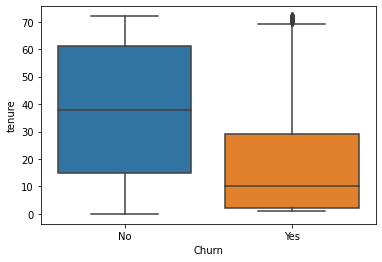

In [194]:
# 1> Longer the duration/tenure of contract of customer lower is the churn rate probability.
sns.boxplot(x="Churn", y="tenure", data=telcoDF)

# Hypothesis is accecpted as evident from the box plot below in maximum cases higher the tenure more is the probability of No Churn. Though their are evident cases with high tenure 
# which have Churned. same can be observed as outliers for Churn Yes Box Plot.

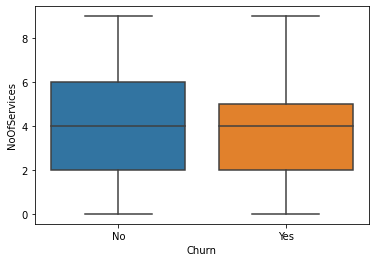

In [195]:
# 2> Lesser the no of subscriptions for additional services higher the possibility of churn.
sns.boxplot(x="Churn", y="NoOfServices", data=telcoDF)

# Hypothesis rejected as it is evidently clear from the box plot below Churn or No Churn is not impacted majorly by the no of services feature. Thus we can drop using this derived feature.

In [196]:
# 3> Customer with extended family (wife and children) lower the probability of churn.
pd.crosstab(telcoDF.Dependents, telcoDF.Churn, normalize='all')

Churn,No,Yes
Dependents,,
No,0.481329,0.219083
Yes,0.253301,0.046287


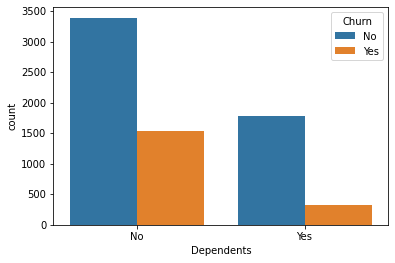

In [197]:
sns.countplot(hue="Churn", x="Dependents", data=telcoDF, )

# hypothesis accepted when data observed with crosstab it is clear that 25% of total population has dependants in which case only 4% have Churned while 48% population without dependants
# has 22% churn rate

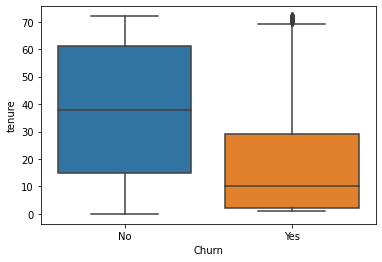

In [198]:
# 4> Tenure and Additional services are importatnt features for churn prediction.
sns.boxplot(x="Churn", y="tenure", data=telcoDF)

# hypothesis accepted for tenure as it is evident from box plot in case of higher tenure their is less churn rate. while for additional services a derived feature it is clear that it 
# doesn not make any significant contribution to variation in data.

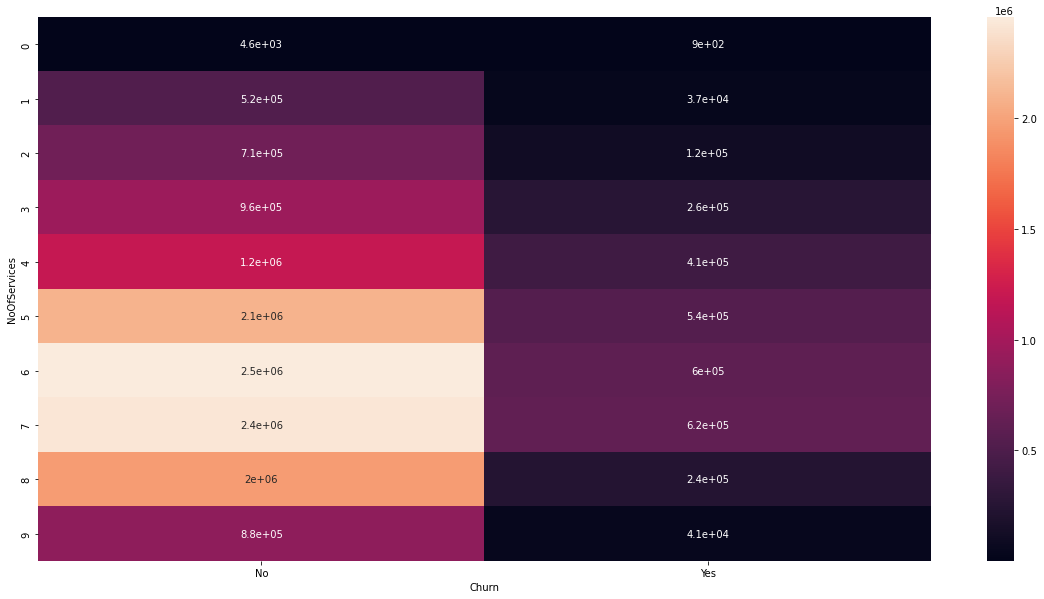

In [199]:
# 5> High Charges leads to higher churn rate as customer are attracted to counter offers from compititors.

plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(telcoDF.NoOfServices, telcoDF.Churn, aggfunc='sum', values=telcoDF.TotalCharges), annot=True)

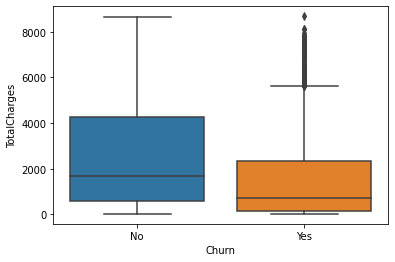

In [200]:
sns.boxplot(x="Churn", y="TotalCharges", data=telcoDF)

# hypothesis rejected as observed in heatmap highest of the values are from Non churn side. still their are higher values where Churn has happened but their is lack of concrete evidence.

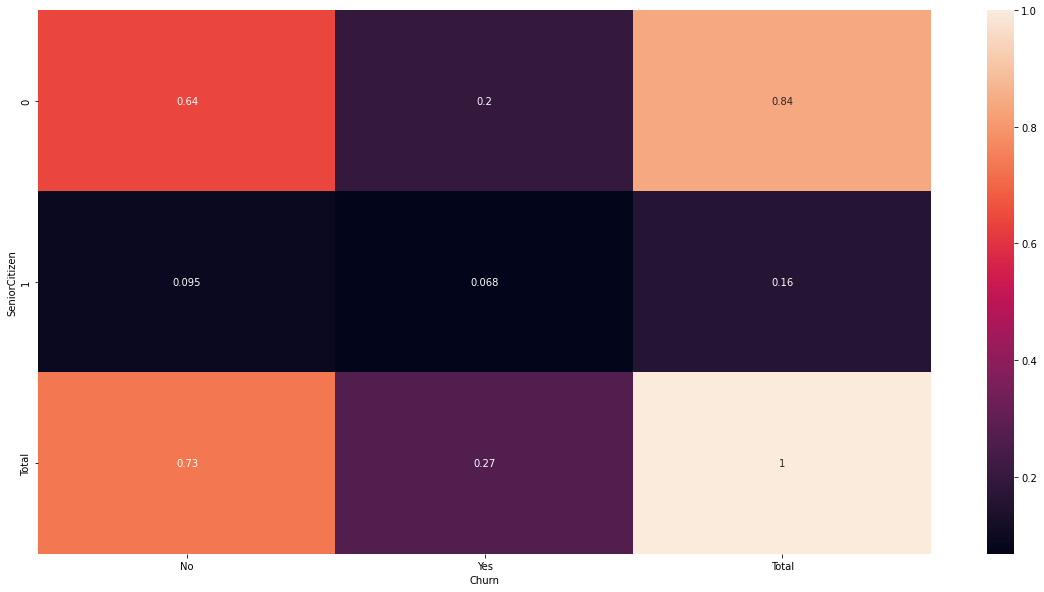

In [201]:
# 6> Senior citizens are less propable to chrun.

plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(telcoDF.SeniorCitizen, telcoDF.Churn, normalize='all', margins=True, margins_name='Total'), annot=True)

# hypothesis rejected as we can see 59% of Senior Citizen have not churned but 41% have churned from below heatmap

# ***Visualising the Data Distribution and Analysis***

No     5174
Yes    1869
Name: Churn, dtype: int64


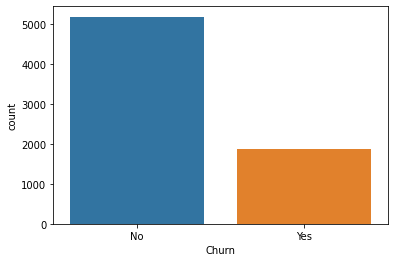

In [202]:
# Checking imbalance in dataset
sns.countplot(x=telcoDF.Churn)
print(telcoDF.Churn.value_counts())
# based on the diagram it is evidently clear that the dataset is highly biased towards No churn observations in the dataset

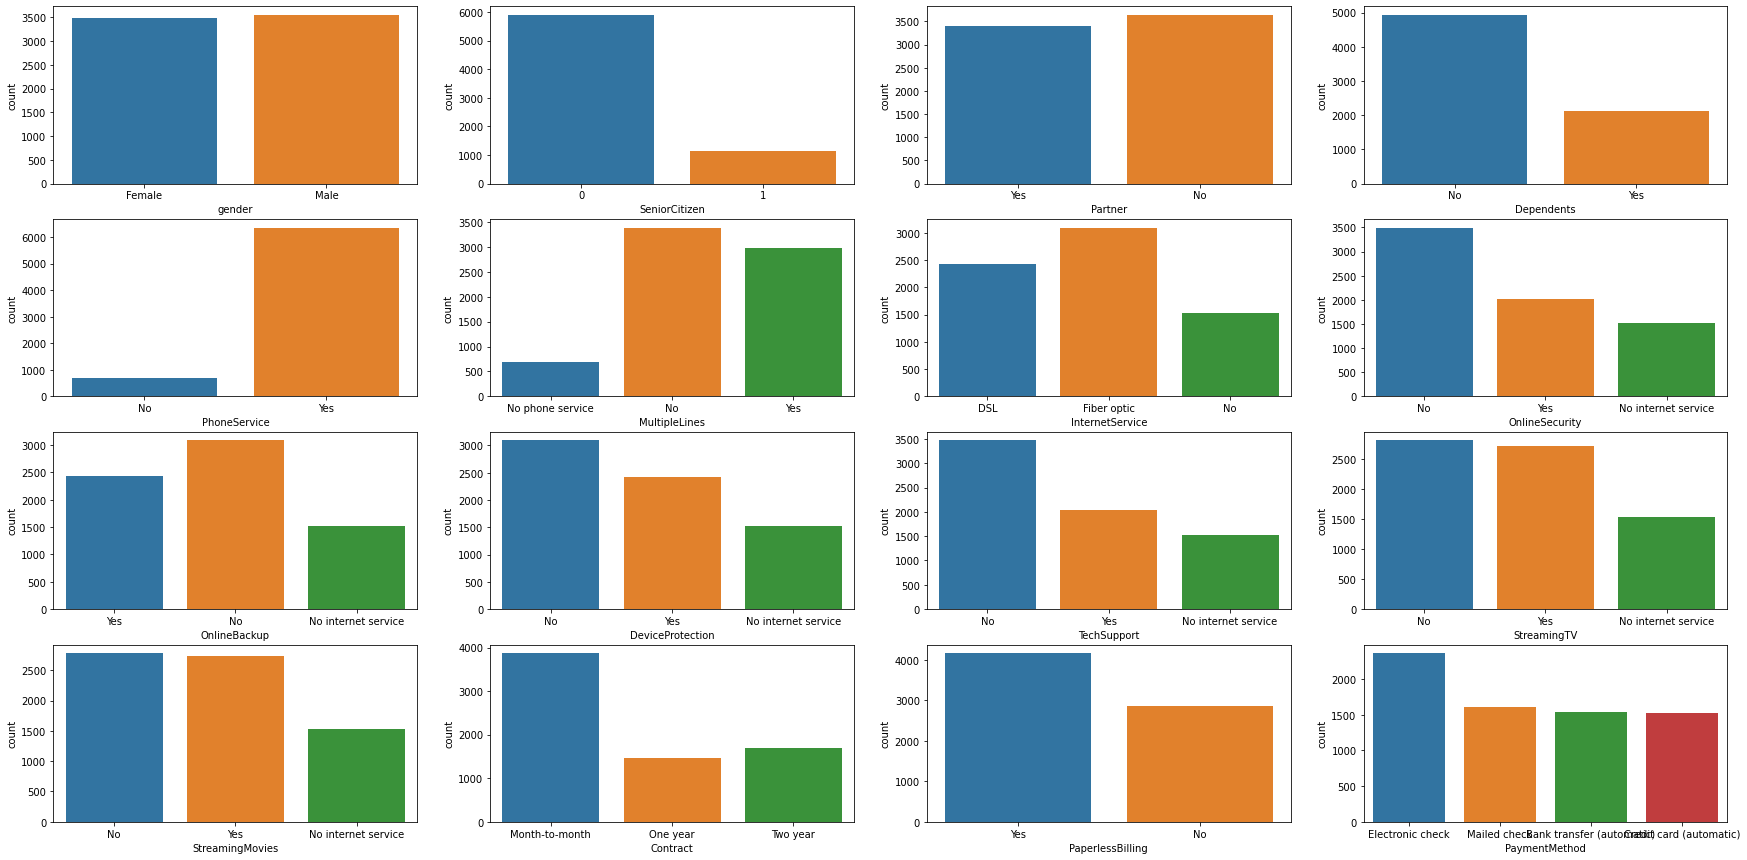

In [203]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4, 4, figsize=(30,15))

sns.countplot(ax=ax[0,0], x=telcoDF.gender)
sns.countplot(ax=ax[0,1], x=telcoDF.SeniorCitizen)
sns.countplot(ax=ax[0,2], x=telcoDF.Partner)
sns.countplot(ax=ax[0,3], x=telcoDF.Dependents)
sns.countplot(ax=ax[1,0], x=telcoDF.PhoneService)
sns.countplot(ax=ax[1,1], x=telcoDF.MultipleLines)
sns.countplot(ax=ax[1,2], x=telcoDF.InternetService)
sns.countplot(ax=ax[1,3], x=telcoDF.OnlineSecurity)
sns.countplot(ax=ax[2,0], x=telcoDF.OnlineBackup)
sns.countplot(ax=ax[2,1], x=telcoDF.DeviceProtection)
sns.countplot(ax=ax[2,2], x=telcoDF.TechSupport)
sns.countplot(ax=ax[2,3], x=telcoDF.StreamingTV)
sns.countplot(ax=ax[3,0], x=telcoDF.StreamingMovies)
sns.countplot(ax=ax[3,1], x=telcoDF.Contract)
sns.countplot(ax=ax[3,2], x=telcoDF.PaperlessBilling)
sns.countplot(ax=ax[3,3], x=telcoDF.PaymentMethod)
fig.show()

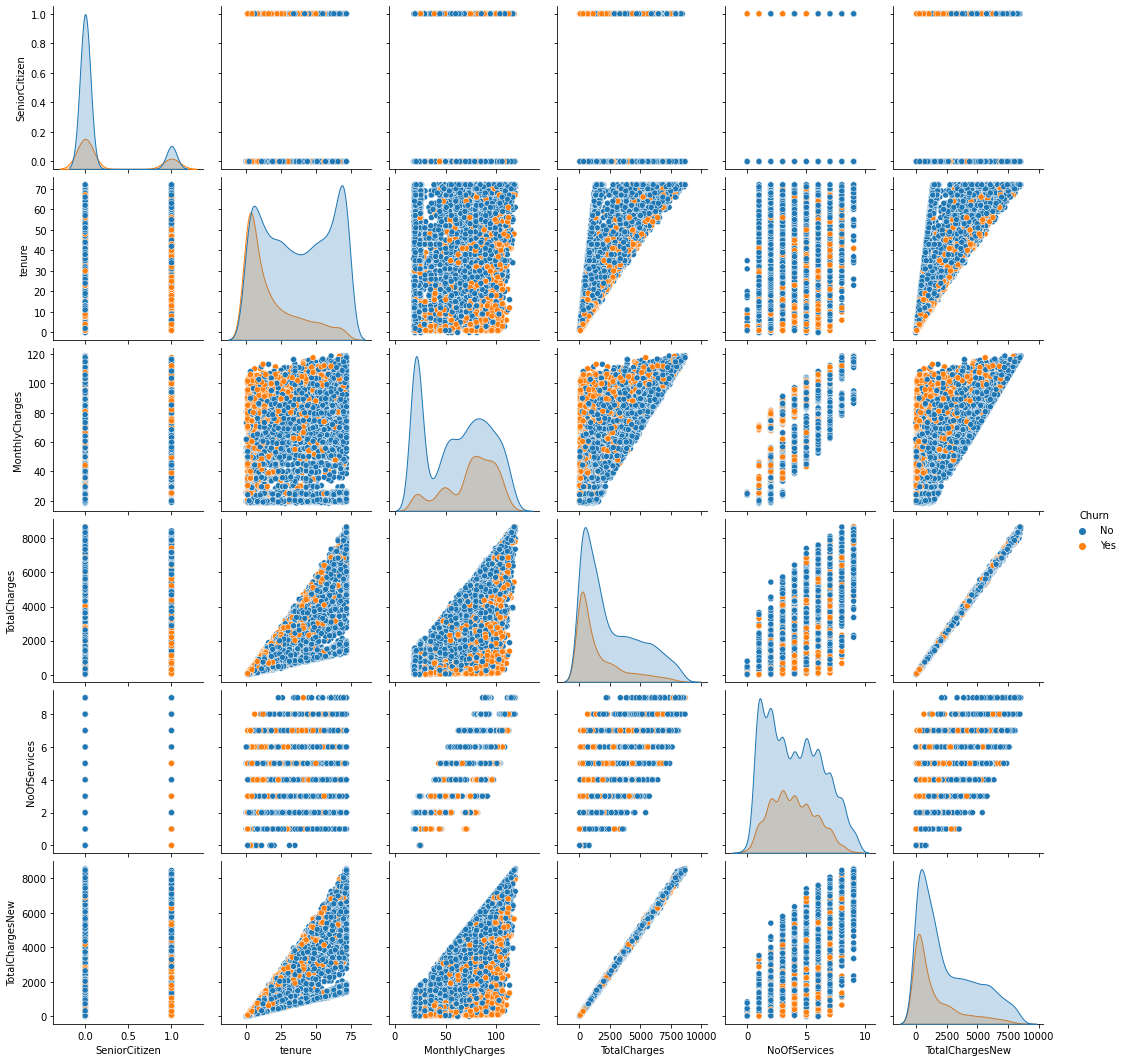

In [204]:
sns.pairplot(telcoDF, hue='Churn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd9b9f2a90>,
      dtype=object)

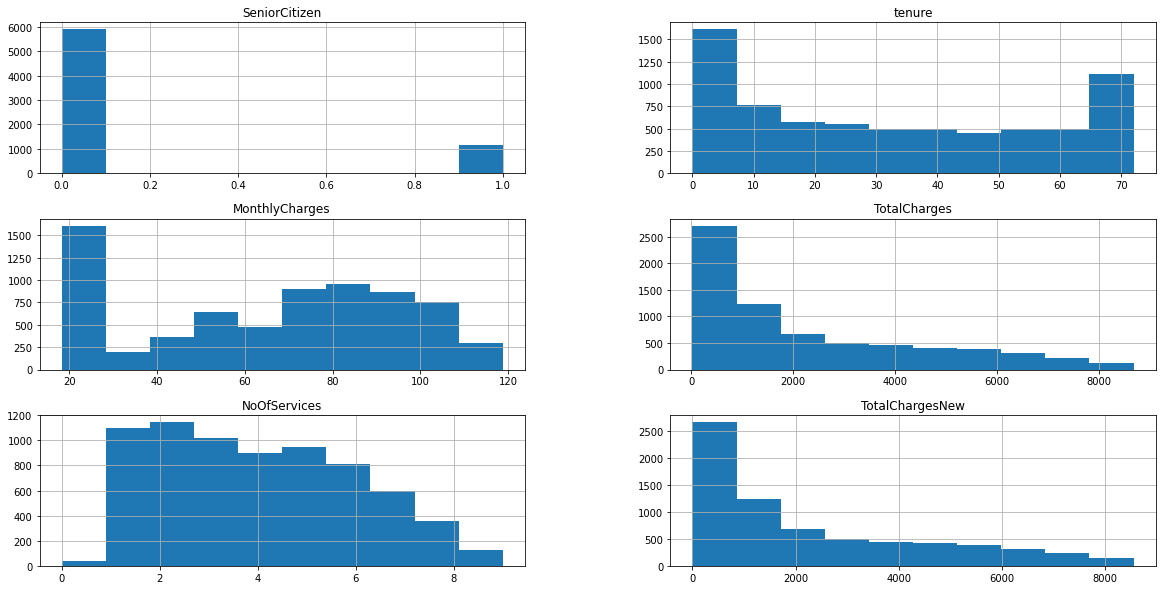

In [205]:
telcoDF.hist(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


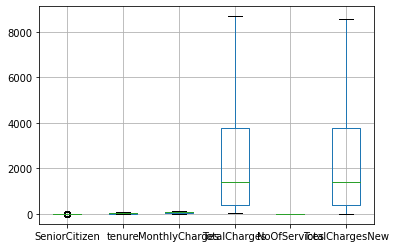

In [206]:
telcoDF.boxplot()

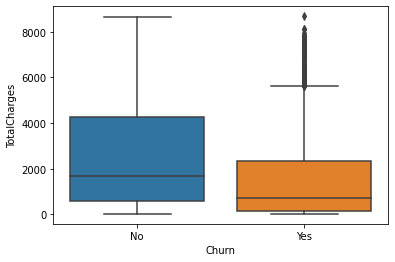

In [207]:
sns.boxplot(x="Churn", y="TotalCharges", data=telcoDF)

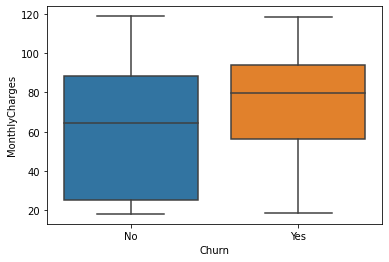

In [208]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=telcoDF)

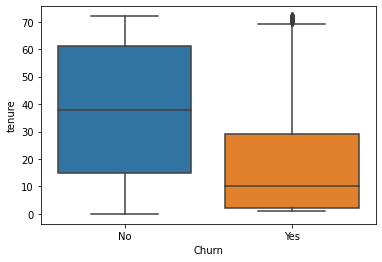

In [209]:
sns.boxplot(x="Churn", y="tenure", data=telcoDF)

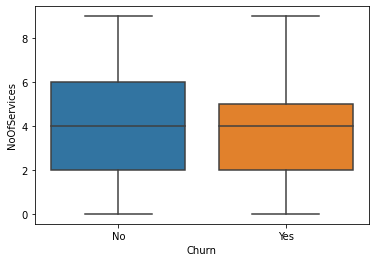

In [210]:
sns.boxplot(x="Churn", y="NoOfServices", data=telcoDF)

# ***Feature Engineering and Selection***

In [211]:
telcoDF = telcoDF.drop(['customerID'], axis = 1)

In [212]:
telcoDF.count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
NoOfServices        7043
TotalChargesNew     7043
dtype: int64

In [213]:
telcoDF.dropna(inplace=True)

In [214]:
telcoDF.count()

gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
NoOfServices        7032
TotalChargesNew     7032
dtype: int64

In [215]:
# split the data in dependant and independant variables
telcoDFX = telcoDF[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
telcoDFy = telcoDF[['Churn']]

In [216]:
# Generate dummeis/one-hot encoding for all the categorical/binary/object type variables
# dummyClmns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
telcoDFX = pd.get_dummies(telcoDFX) #, columns=dummyClmns)

In [217]:
telcoDFX.to_csv('/content/drive/MyDrive/TSW_IIT_CapstoneProject/5 Telecom Customer Churn/Telco-Customer-Churn_file2_trainx_one_hot_encoded.csv')

In [218]:
# converting target column into binary values 1/0 using label encoder for classification
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
telcoDFy['Churn'] = label_encoder.fit_transform(telcoDFy['Churn'])
telcoDFy['Churn'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

In [219]:
# splitting dataset into train test splits
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# we will be using SMOTE to handle imbalanced data and upsample the data before spliting the train test data
sm =SMOTE(random_state=27)
telcoDFXrs, telcoDFyrs = sm.fit_resample(telcoDFX, telcoDFy)
print("Shapes of X train {0} and y Train {1} data after resampling/upsampling is".format(telcoDFXrs.shape,telcoDFyrs.shape))
X_train, X_test, y_train, y_test = train_test_split(telcoDFXrs, telcoDFyrs, test_size = 0.25, random_state = 0)

Shapes of X train (10326, 45) and y Train (10326, 1) data after resampling/upsampling is


In [220]:
# apply standardisation to numerical columns so all values are at same scale for better ML performace
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
scaledData = pd.DataFrame(X_train)
scaledData.to_csv('/content/drive/MyDrive/TSW_IIT_CapstoneProject/5 Telecom Customer Churn/Telco-Customer-Churn_file3_trainx_min-max_normalized.csv')

# ***Identifying Top Features using VarianceThreshold Method***

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
telcoDFXsc = pd.DataFrame(scaler.fit_transform(telcoDFX), columns = telcoDFX.columns)
telcoDFXsc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,3.056334,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,1.005419,-0.52513,-0.633746,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,-0.884596,-0.52513,1.378330,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,3.056334,-3.056334,-0.963411,3.056334,-0.854336,1.382243,-0.886896,-0.52513,-0.994611,-0.52513,1.577918,1.130460,-0.52513,-0.725516,-0.886385,-0.52513,1.381372,-0.987563,-0.52513,1.564308,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.037979,-0.327189,-0.854336,-0.723462,1.127527,-0.52513,1.005419,-0.52513,-0.633746,1.130460,-0.52513,-0.725516,1.128178,-0.52513,-0.723918,1.012594,-0.52513,-0.639260,1.226125,-0.52513,-0.790186,1.23636,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604


In [223]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(telcoDFXsc)
telcoDFXsc.columns[selector.get_support()]

Index(['Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'MultipleLines_No', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'StreamingMovies_Yes', 'Contract_One year',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')

# ***Identifying top features using SelectKBest Method***

In [224]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =10)
selector.fit(telcoDFX, telcoDFy)
telcoDFX.columns[selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'Contract_Month-to-month', 'Contract_Two year'],
      dtype='object')

# ***Feature selection with information gain***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


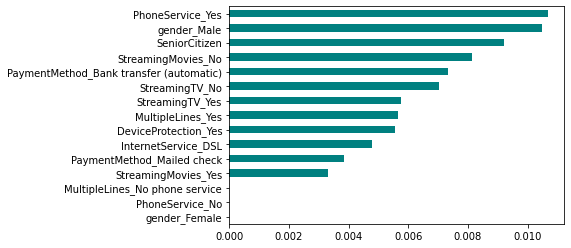

In [225]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(telcoDFX, telcoDFy)
feat_importances = pd.Series(importances, telcoDFX.columns[0:len(telcoDFX.columns)]).sort_values(ascending=True)
feat_importances.head(15).plot(kind='barh', color='teal')
plt.show()

# ***Feature selection using Correlation***

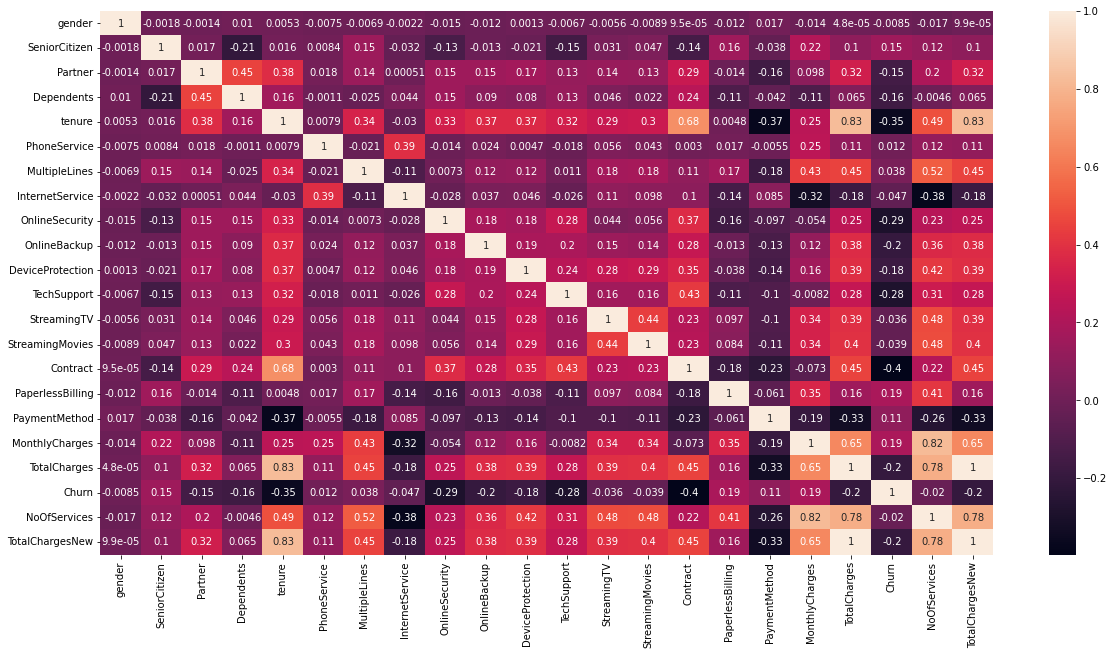

In [226]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
# labelEncode = preprocessing.LabelEncoder()
 
# create copy of the original dataframe so copy can be used to apply encoding and perform correlation to identify important attributes.
telcoDFheatMap = telcoDF

# apply label encoding to convert data to numerical values to be used for correlation
telcoDFheatMap[cols] = telcoDFheatMap[cols].apply(preprocessing.LabelEncoder().fit_transform)
# telcoDFheatMap.head(10)

# plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(telcoDFheatMap.corr(), annot=True)

# ***Model Building and Evaluation***

# ***Logistic regression***

In [227]:
# from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
classifier = lm.LogisticRegression(random_state = 0)
classifier.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [228]:
# apply predictions on test dataset
y_pred_logr = classifier.predict(X_test)

In [229]:
# Generate confusion matrix and accuracy for the results obtained
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_logr)
print(cm)
accuracy_score(y_test, y_pred_logr)

[[1132  145]
 [ 193 1112]]


0.8690937257939582

In [230]:
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1277
           1       0.88      0.85      0.87      1305

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582



In [231]:
# classifier.n_features_in_
# classifier.feature_names_in_

# ***Navie Bayes***

In [232]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, np.ravel(y_train))

GaussianNB()

In [233]:
# apply predictions on test dataset
y_pred_NB = classifierNB.predict(X_test)

In [234]:
# Generate confusion matrix and accuracy for the results obtained
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmNB = confusion_matrix(y_test, y_pred_NB)
print(cmNB)
accuracy_score(y_test, y_pred_NB)

[[ 917  360]
 [ 170 1135]]


0.7947327652982185

In [235]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1277
           1       0.76      0.87      0.81      1305

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582



# ***Stochastic Gradient Descent***

In [236]:
from sklearn.linear_model import SGDClassifier
classifierSgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifierSgd.fit(X_train, np.ravel(y_train))

SGDClassifier(loss='modified_huber', random_state=0)

In [237]:
# apply predictions on test dataset
y_pred_sgd = classifierSgd.predict(X_test)

In [238]:
# Generate confusion matrix and accuracy for the results obtained
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmSgd = confusion_matrix(y_test, y_pred_sgd)
print(cmSgd)
accuracy_score(y_test, y_pred_sgd)

[[1041  236]
 [ 183 1122]]


0.8377226955848179

In [239]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1277
           1       0.83      0.86      0.84      1305

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



# ***K-Nearest Neighbour***

In [240]:
from sklearn.neighbors import KNeighborsClassifier
classifierKnn = KNeighborsClassifier(n_neighbors=12)
classifierKnn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=12)

In [241]:
# apply predictions on test dataset
y_pred_knn = classifierKnn.predict(X_test)

In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmKnn = confusion_matrix(y_test, y_pred_knn)
print(cmKnn)
accuracy_score(y_test, y_pred_knn)

[[1077  200]
 [ 197 1108]]


0.8462432223082882

In [243]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1277
           1       0.85      0.85      0.85      1305

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



***# Decision Tree Classifier***

In [244]:
from sklearn.tree import DecisionTreeClassifier
classifierDt = DecisionTreeClassifier(max_depth=8,random_state=0,max_features=None,min_samples_leaf=14)
classifierDt.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(max_depth=8, min_samples_leaf=14, random_state=0)

In [245]:
# apply predictions on test dataset
y_pred_dt = classifierDt.predict(X_test)

In [246]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmDt = confusion_matrix(y_test, y_pred_dt)
print(cmDt)
accuracy_score(y_test, y_pred_dt)

[[1063  214]
 [ 211 1094]]


0.8353989155693261

In [247]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1277
           1       0.84      0.84      0.84      1305

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



# ***Random Forest Classifier***

In [248]:
from sklearn.ensemble import RandomForestClassifier
classifierRft = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=0,max_features=None,min_samples_leaf=30)
classifierRft.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=0)

In [249]:
# apply predictions on test dataset
y_pred_rft = classifierRft.predict(X_test)

In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmRft = confusion_matrix(y_test, y_pred_rft)
print(cmRft)
accuracy_score(y_test, y_pred_rft)

[[1095  182]
 [ 189 1116]]


0.8563129357087529

In [251]:
print(classification_report(y_test, y_pred_rft))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1277
           1       0.86      0.86      0.86      1305

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582



# ***Support Vector Classifier - Linear***

In [252]:
from sklearn.svm import SVC
classifierSvc = SVC(kernel='linear',C=0.025,random_state=0)
classifierSvc.fit(X_train, np.ravel(y_train))

SVC(C=0.025, kernel='linear', random_state=0)

In [253]:
# apply predictions on test dataset
y_pred_svc = classifierSvc.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmSvc = confusion_matrix(y_test, y_pred_svc)
print(cmSvc)
accuracy_score(y_test, y_pred_svc)

[[1123  154]
 [ 204 1101]]


0.8613477924089853

In [255]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1277
           1       0.88      0.84      0.86      1305

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582



# ***Support Vector Classifier - Non-Linear***

In [256]:
from sklearn.svm import SVC
classifierSvcRbf = SVC(kernel='rbf',C=0.025,random_state=0)
classifierSvcRbf.fit(X_train, np.ravel(y_train))

SVC(C=0.025, random_state=0)

In [257]:
# apply predictions on test dataset
y_pred_svcrbf = classifierSvcRbf.predict(X_test)

In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmSvc = confusion_matrix(y_test, y_pred_svcrbf)
print(cmSvc)
accuracy_score(y_test, y_pred_svcrbf)

[[1074  203]
 [ 209 1096]]


0.8404337722695585

In [259]:
print(classification_report(y_test, y_pred_svcrbf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1277
           1       0.84      0.84      0.84      1305

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



# ***Gradient Bossting Algorithm***

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
classifierGB.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [261]:
# apply predictions on test dataset
y_pred_gb = classifierGB.predict(X_test)

In [262]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmGB = confusion_matrix(y_test, y_pred_gb)
print(cmGB)
accuracy_score(y_test, y_pred_gb)

[[1115  162]
 [ 177 1128]]


0.8687064291247095

In [263]:
print(classification_report(y_test, y_pred_rft))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1277
           1       0.86      0.86      0.86      1305

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582



# ***Ada boost Algorithm***

In [264]:
from sklearn.ensemble import AdaBoostClassifier
classifierADB = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')
classifierADB.fit(X_train, np.ravel(y_train))

AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0)

In [265]:
# apply predictions on test dataset
y_pred_adb = classifierADB.predict(X_test)

In [266]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmADB = confusion_matrix(y_test, y_pred_adb)
print(cmADB)
accuracy_score(y_test, y_pred_adb)

[[ 739  538]
 [ 197 1108]]


0.7153369481022464

In [267]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1277
           1       0.67      0.85      0.75      1305

    accuracy                           0.72      2582
   macro avg       0.73      0.71      0.71      2582
weighted avg       0.73      0.72      0.71      2582



# ***XG Boost Algorithm***

In [268]:
from xgboost import XGBClassifier
# classifierXGB = XGBClassifier(colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.01,
#               max_depth=6, n_estimators=500, subsample=0.5)
classifierXGB = XGBClassifier()
classifierXGB.fit(X_train, np.ravel(y_train))

XGBClassifier()

In [269]:
# apply predictions on test dataset
y_pred_xgb = classifierXGB.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmXGB = confusion_matrix(y_test, y_pred_xgb)
print(cmXGB)
accuracy_score(y_test, y_pred_xgb)

[[1107  170]
 [ 154 1151]]


0.8745158791634392

In [271]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1277
           1       0.87      0.88      0.88      1305

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582



In [272]:
testResDF = pd.DataFrame(X_test)
testResDF['Predict'] = classifierXGB.predict(X_test)
testResDF.to_csv('/content/drive/MyDrive/TSW_IIT_CapstoneProject/5 Telecom Customer Churn/Telco-Customer-Churn_file4_testx_prediction.csv')

# ***Cat Boost Algorithm***

In [273]:
!pip install catboost

In [274]:
from catboost import CatBoostClassifier
classifierCB = CatBoostClassifier()
classifierCB.fit(X_train, np.ravel(y_train))

Learning rate set to 0.02469
0:	learn: 0.6747856	total: 11ms	remaining: 11s
1:	learn: 0.6626845	total: 16.4ms	remaining: 8.21s
2:	learn: 0.6454749	total: 21.5ms	remaining: 7.15s
3:	learn: 0.6292090	total: 26.4ms	remaining: 6.56s
4:	learn: 0.6158814	total: 31.9ms	remaining: 6.34s
5:	learn: 0.6021703	total: 38ms	remaining: 6.3s
6:	learn: 0.5848584	total: 42.7ms	remaining: 6.06s
7:	learn: 0.5738479	total: 47.3ms	remaining: 5.86s
8:	learn: 0.5623328	total: 51.9ms	remaining: 5.71s
9:	learn: 0.5541123	total: 56.6ms	remaining: 5.6s
10:	learn: 0.5447089	total: 61.2ms	remaining: 5.5s
11:	learn: 0.5371531	total: 71.5ms	remaining: 5.89s
12:	learn: 0.5279733	total: 79.1ms	remaining: 6s
13:	learn: 0.5200989	total: 85.6ms	remaining: 6.03s
14:	learn: 0.5104063	total: 93.3ms	remaining: 6.13s
15:	learn: 0.5023839	total: 98.1ms	remaining: 6.03s
16:	learn: 0.4945843	total: 103ms	remaining: 5.95s
17:	learn: 0.4879737	total: 108ms	remaining: 5.87s
18:	learn: 0.4831554	total: 112ms	remaining: 5.79s
19:	lear

In [275]:
# apply predictions on test dataset
y_pred_cb = classifierCB.predict(X_test)

In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cmCB = confusion_matrix(y_test, y_pred_cb)
print(cmCB)
accuracy_score(y_test, y_pred_cb)

[[1126  151]
 [ 199 1106]]


0.8644461657629744

In [277]:
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1277
           1       0.88      0.85      0.86      1305

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.87      0.86      0.86      2582



# ***Hyper Parameter Tuning for top performing models***

# ***Hyper Parameter Tuning Logistic Regression***

In [278]:
# # Load libraries
# from scipy.stats import uniform
# from sklearn import linear_model, datasets
# from sklearn.model_selection import RandomizedSearchCV

# # solvers = ['liblinear']
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['none']
# # , 'l2', 'elasticnet', 'none']
# c_values = [200, 150, 100, 10, 1.0, 0.1, 0.01]

# # Create hyperparameter options
# hyperparameters = dict()

# # Create randomized search 5-fold cross validation and 100 iterations
# clf = RandomizedSearchCV(classifier, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# # Fit randomized search
# best_model = clf.fit(X_train, y_train)

# # View best hyperparameters
# print('Best estimators:', best_model.best_estimator_)
# print('Best score:', best_model.best_score_)
# # print('Best C:', best_model.best_estimator_.get_params()['C'])

# ***Hyper parameter tuning XG Boost***

In [279]:
# from sklearn.model_selection import RandomizedSearchCV

# params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': np.arange(0.5, 1.0, 0.1),
#            'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'n_estimators': [100, 500, 1000]}

# clf = RandomizedSearchCV(estimator=classifierXGB,
#                          param_distributions=params,
#                          scoring='neg_mean_squared_error',
#                          n_iter=30,
#                          verbose=1)

# clf.fit(X_train, np.ravel(y_train))
# print("Best parameters:", clf.best_params_)
# print("Best score:", clf.best_score_)
# print("Best estimator:", clf.best_estimator_)
# print("Best index:", clf.best_index_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))